In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib as plt
from sklearn  import linear_model
from sklearn   import tree
from sklearn import ensemble
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import  StandardScaler
import xgboost

In [ ]:


data = pd.read_csv("C:\Users\ELCOT\Desktop\project t\traffic volume.csv")
data.head()


,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,None,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,None,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,None,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,None,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,None,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         48204 non-null  object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


In [5]:
import collections

In [6]:
import collections
print(collections.Counter(data["rain"]))
print(collections.Counter(data["snow"]))

Counter({0.0: 44735, 0.25: 948, 0.51: 256, 1.02: 123, 0.3: 121, 0.76: 109, 0.38: 99, 1.78: 91, 1.52: 69, 0.64: 55, 1.27: 50, 0.6: 32, 2.79: 29, 0.44: 26, 0.89: 25, 2.54: 23, 0.28: 23, 0.42: 21, 1.4: 21, 0.34: 20, 2.16: 19, 2.29: 19, 2.03: 19, 1.8: 16, 1.09: 16, 3.05: 15, 0.32: 15, 1.2: 15, 0.9: 15, 0.98: 14, 0.68: 13, 0.81: 13, 4.57: 13, 7.11: 12, 0.85: 12, 0.7: 11, 2.1: 11, 0.55: 11, 5.59: 10, 1.86: 10, 8.4: 10, 1.15: 10, 0.47: 9, 5.08: 9, 1.21: 9, 0.43: 9, 6.1: 9, 5.84: 8, 1.66: 8, 0.79: 8, 0.4: 8, 1.14: 8, 2.2: 8, 1.85: 8, 2.41: 8, 3.3: 8, 1.41: 7, 6.6: 7, 0.35: 7, 1.91: 7, 0.52: 7, 1.3: 7, 0.8: 7, 0.66: 7, 2.67: 7, 1.33: 7, 1.1: 7, 4.06: 7, 0.57: 6, 0.29: 6, 0.36: 6, 1.0: 6, 1.44: 6, 8.64: 6, 1.35: 6, 5.97: 6, 0.56: 6, 0.91: 6, 0.54: 6, 0.94: 6, 0.96: 6, 2.86: 6, 0.78: 6, 2.22: 6, 6.35: 6, 4.89: 6, 0.93: 6, 3.13: 6, 0.63: 6, 2.62: 6, 1.6: 6, 4.74: 6, 2.76: 6, 3.45: 6, 0.69: 5, 3.18: 5, 0.61: 5, 5.42: 5, 1.39: 5, 0.53: 5, 0.48: 5, 0.59: 5, 0.71: 5, 0.27: 5, 2.85: 5, 0.65: 5, 1.5: 5,

In [7]:
data.isnull().sum()

holiday            0
temp              53
rain               2
snow              12
weather           49
date               0
Time               0
traffic_volume     0
dtype: int64

In [8]:
import collections
data['temp'].fillna(data['temp'].mean(),inplace=True)
data['rain'].fillna(data['rain'].mean(),inplace=True)
data['snow'].fillna(data['snow'].mean(),inplace=True)
print(collections.Counter(data['weather']))

Counter({'Clouds': 15144, 'Clear': 13383, 'Mist': 5942, 'Rain': 5665, 'Snow': 2875, 'Drizzle': 1818, 'Haze': 1359, 'Thunderstorm': 1033, 'Fog': 912, nan: 49, 'Smoke': 20, 'Squall': 4})


In [9]:
data['weather'].fillna('clouds',inplace=True)

In [10]:
#splitting the date column into year,month,day
data[["day","month","year"]]=data ["date"].str.split("-",expand =True)

In [11]:
#spliting the date column  into year,month,day
data[["hours","minutes","seconds"]]=data ["Time"].str.split(':',expand=True)

In [12]:
data.drop(columns=['date','Time'],axis=1,inplace=True)

In [13]:
data.head()

,holiday,temp,rain,snow,weather,traffic_volume,day,month,year,hours,minutes,seconds
0,None,288.28,0.0,0.0,Clouds,5545,02,10,2012,09,00,00
1,None,289.36,0.0,0.0,Clouds,4516,02,10,2012,10,00,00
2,None,289.58,0.0,0.0,Clouds,4767,02,10,2012,11,00,00
3,None,290.13,0.0,0.0,Clouds,5026,02,10,2012,12,00,00
4,None,291.14,0.0,0.0,Clouds,4918,02,10,2012,13,00,00


In [14]:
data.corr()

,temp,rain,snow,traffic_volume
temp,1.000000,0.009070,-0.019758,0.130034
rain,0.009070,1.000000,-0.000090,0.004714
snow,-0.019758,-0.000090,1.000000,0.000735
traffic_volume,0.130034,0.004714,0.000735,1.000000


<AxesSubplot:>

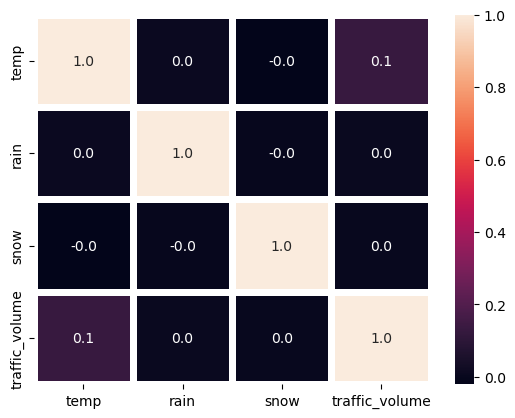

In [15]:
sns.heatmap(data.corr(),annot=True,  linewidth=5,fmt=".1f")

In [16]:
data.describe()

,temp,rain,snow,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205351,0.334278,0.000222,3259.818355
std,13.336338,44.789133,0.008168,1986.860670
min,0.000000,0.000000,0.000000,0.000000
25%,272.180000,0.000000,0.000000,1193.000000
50%,282.429000,0.000000,0.000000,3380.000000
75%,291.800000,0.000000,0.000000,4933.000000
max,310.070000,9831.300000,0.510000,7280.000000


/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weather', ylabel='count'>

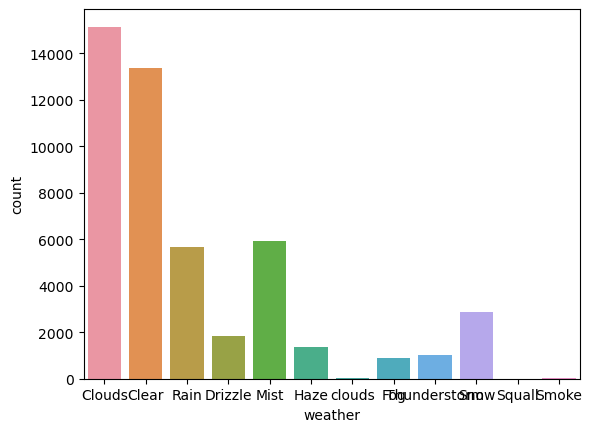

In [17]:
sns.countplot(data["weather"])

/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='holiday', ylabel='count'>

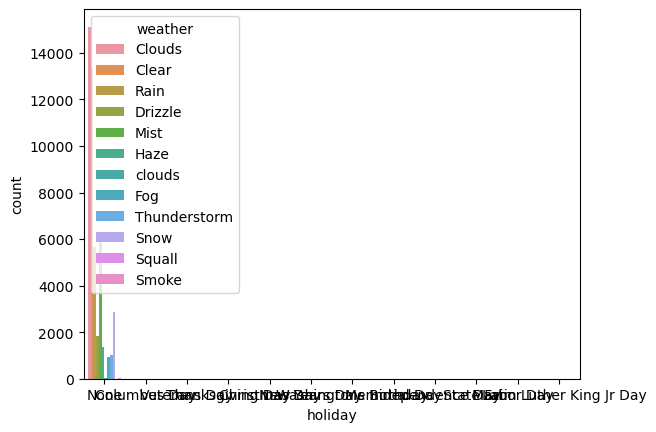

In [18]:
sns.countplot(data['holiday'],hue=data['weather'])

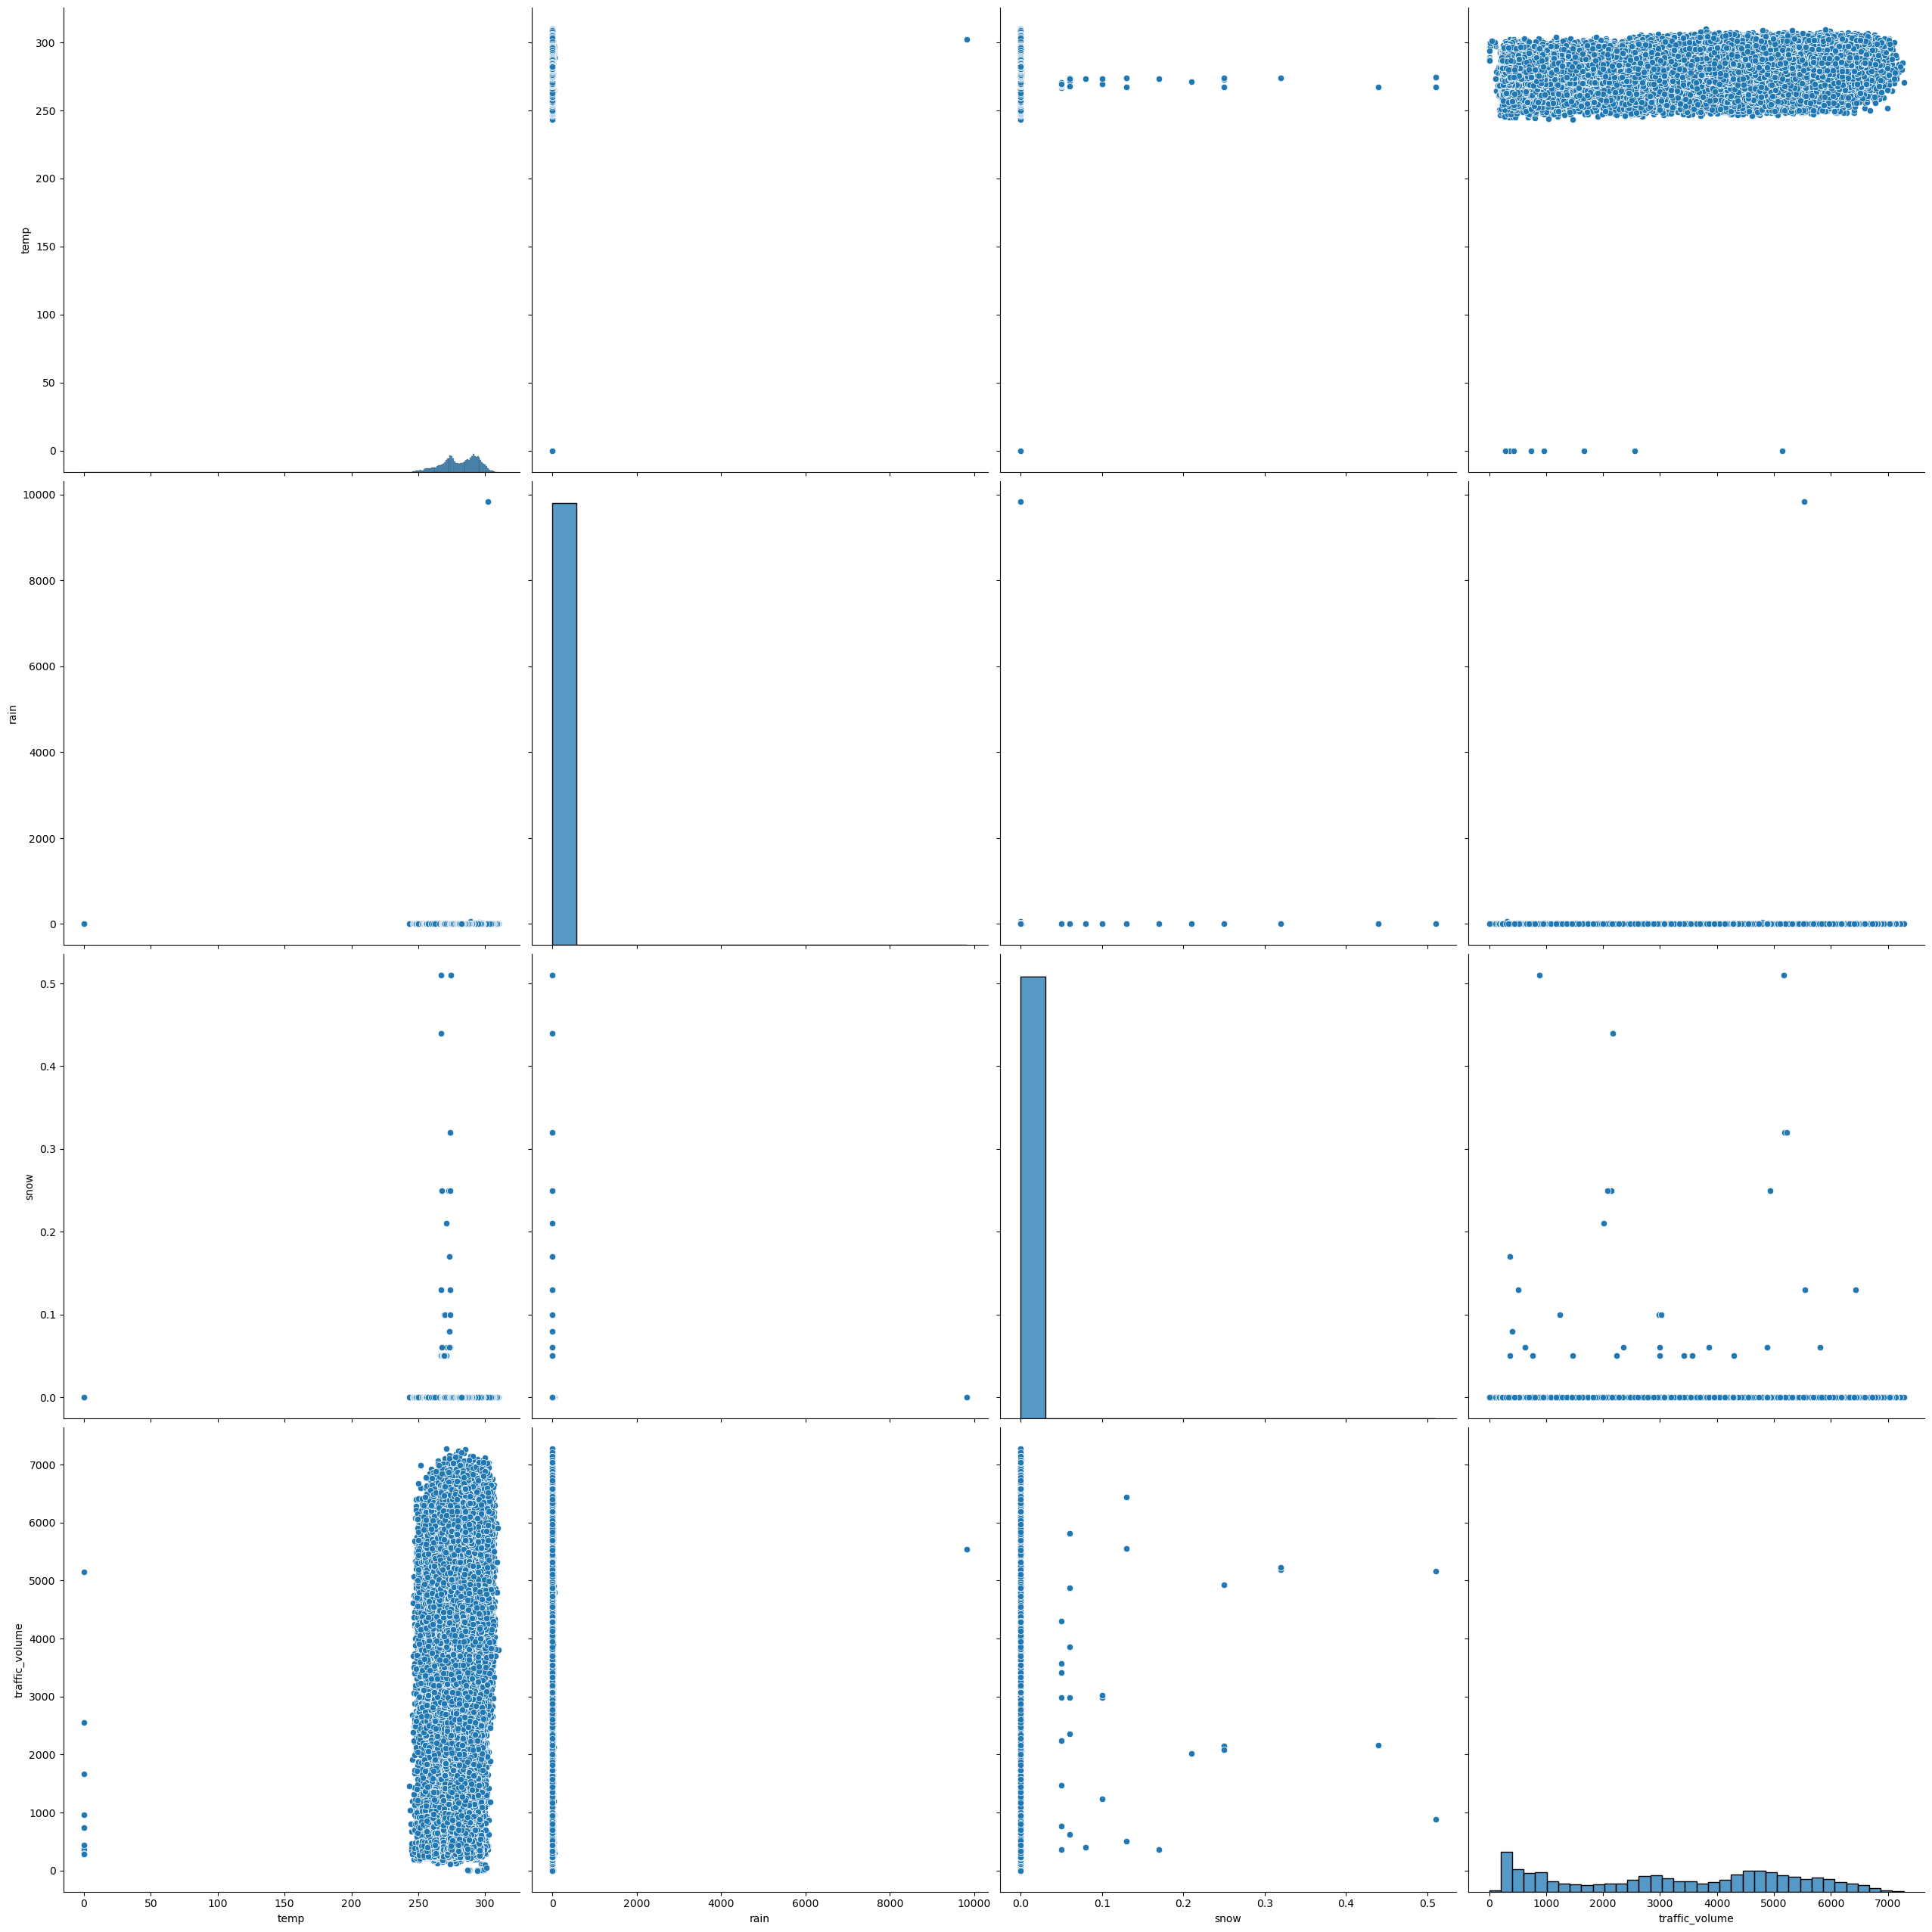

In [19]:
sns.pairplot(data,height=6.5)

In [20]:
y = data['traffic_volume'] 

X= data.drop(columns=['traffic_volume'],axis=1)
X
y

0        5545
1        4516
2        4767
3        5026
4        4918
         ... 
48199    3543
48200    2781
48201    2159
48202    1450
48203     954
Name: traffic_volume, Length: 48204, dtype: int64

In [21]:
names=X.columns

In [22]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [23]:
le = preprocessing.LabelEncoder()        # create an instance of the LabelEncoder
data['weather'] = le.fit_transform(data['weather'])      # perform encoding on the sex column
data['holiday'] = le.fit_transform(data['holiday'])

In [24]:
from sklearn .preprocessing import scale

In [25]:
scaler = StandardScaler()  # create an instance of the StandardScaler
data_scaled = scaler.fit_transform(data.drop('weather', axis=1))

In [52]:
X_scaled = scale(X)

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
# create dataset
X, y = make_blobs(n_samples=1000)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.67)

In [28]:
# demonstrate that the train-test split procedure is repeatable
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
# create dataset
X, y = make_blobs(n_samples=100)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize first 5 rows
print(X_train[5:, :])
# split again, and we should see the same split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize first 5 rows
print(X_train[5:, :])

[[ 6.38677136  0.29607907]
 [-6.1788441  -7.59087153]
 [ 1.63525805  5.04126087]
 [-2.26523529 -8.98595013]
 [ 3.22463024  3.84901613]
 [ 6.6822283   1.98848281]
 [-6.05012288 -8.49035519]
 [ 2.44975092  5.02808115]
 [ 7.09345281  0.23694807]
 [-4.85814455 -8.16944412]
 [-5.79491141 -7.63632616]
 [ 4.86142779  4.2802583 ]
 [ 6.3234911   0.28551366]
 [ 2.2311159   4.06483041]
 [ 5.1045878   1.9347692 ]
 [ 5.32573429  1.31994474]
 [-5.28496055 -7.92054939]
 [-5.10313464 -6.97314131]
 [ 5.8786854   4.03601771]
 [-5.45879562 -9.16327991]
 [ 7.31418053  1.95541693]
 [ 7.10232565  0.84332879]
 [ 3.1539131   3.19550172]
 [ 2.81761565  3.94195971]
 [-6.2188561  -7.8428478 ]
 [ 3.99986776  4.75410111]
 [ 4.42155816  3.7889211 ]
 [ 7.20602684 -0.27027996]
 [-5.36343507 -8.53575642]
 [-4.30424902 -7.28942143]
 [ 4.06692103  4.43266431]
 [-5.11834297 -9.32844892]
 [-5.55671338 -6.68350648]
 [ 5.67925397  5.89708058]
 [-5.6209161  -8.18730848]
 [-5.27948732 -8.07315942]
 [ 3.18182742  5.03679819]
 

In [29]:
# split imbalanced dataset into train and test sets without stratification
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# create dataset
X, y = make_classification(n_samples=100, weights=[0.94], flip_y=0, random_state=1)
print(Counter(y))
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1)
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 94, 1: 6})
Counter({0: 45, 1: 5})
Counter({0: 49, 1: 1})


In [30]:
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(80, 20) (20, 20) (80,) (20,)


In [31]:
# fit the model
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [32]:
lin_reg=linear_model.LinearRegression()
Dtree=tree.DecisionTreeRegressor()
Rand=ensemble.RandomForestRegressor()
SVR=svm.SVR()
XGB=xgboost.XGBRegressor()

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [34]:
lin_reg.fit(X_train,y_train)
Dtree.fit(X_train,y_train)
Rand.fit(X_train,y_train)
SVR.fit(X_train,y_train)
XGB.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [35]:
X.reshape(-1,1)

array([[ 1.44544531],
       [-1.02330109],
       [ 1.32041791],
       ...,
       [-0.3678322 ],
       [-1.1810629 ],
       [ 1.56975551]])

In [36]:
p1=lin_reg.predict(X_train)
p2=Dtree.predict(X_train)
p3=Rand.predict(X_train)
p4=SVR.predict(X_train)
p5=XGB.predict(X_train)

In [37]:
y.reshape(1,-1)

array([[0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [38]:
p1=lin_reg.predict(X_test)
p2=Dtree.predict(X_test)
p3=Rand.predict(X_test)
p4=SVR.predict(X_test)
p5=XGB.predict(X_test)

In [55]:
import numpy as np

y_train_reshaped = np.reshape(y_train, (-1, 1))

In [ ]:
p1 = lin_reg.predict(y_train_reshaped)
p1 = lin_reg.predict(y_train_reshaped)

In [40]:
from sklearn import metrics
print(metrics.r2_score(p1,y_test))
print(metrics.r2_score(p2,y_test))
print(metrics.r2_score(p3,y_test))
print(metrics.r2_score(p4,y_test))
print(metrics.r2_score(p5,y_test))

0.6692706581412042
1.0
0.9994514506387857
-4.925515752937975
0.9999997935283046


In [46]:
y_train_subset = y_train[:20]

In [47]:
import numpy as np
from sklearn import metrics

# Assuming p1, p2, p3, p4, p5 are numpy arrays with shape (20,)
# and y_train is a numpy array with shape (80,)
p1_subset = p1[:20]
p2_subset = p2[:20]
p3_subset = p3[:20]
p4_subset = p4[:20]
p5_subset = p5[:20]
y_train_subset = y_train[:20]

print(metrics.r2_score(p1_subset, y_train_subset))
print(metrics.r2_score(p2_subset, y_train_subset))
print(metrics.r2_score(p3_subset, y_train_subset))
print(metrics.r2_score(p4_subset, y_train_subset))
print(metrics.r2_score(p5_subset, y_train_subset))

-2.4481083583068974
-2.157894736842106
-2.247960767749686
-14.115677092500913
-2.1597455004714994


In [51]:
MSE=metrics.mean_squared_error(p3,y_test)
np.sqrt(MSE)

0.005000000000000004

In [49]:
import pickle

In [50]:
pickle.dump(Rand,open("model.pkl",'wb'))
pickle.dump(le,open("encoder.pkl",'wb'))